In [1]:
#s3_prediction = "s3://aegovan-data/chemprot/predictions_chemprot-bert-f1-2022-05-22-23-18-21-560/prediction_chemprot_test.json"
s3_train="s3://aegovan-data/selfsupervised_chemprot/predictions_selfsupervised-bert-f1-2022-09-17-23-42-42-470/2022091718/train.json.json"
s3_test="s3://aegovan-data/selfsupervised_chemprot/predictions_selfsupervised-bert-f1-2022-09-17-23-42-42-470/2022091718/test.json.json"
s3_val="s3://aegovan-data/selfsupervised_chemprot/predictions_selfsupervised-bert-f1-2022-09-17-23-42-42-470/2022091718/val.json.json"





In [2]:
import sys, os, pandas as pd
sys.path.append("../src")

import utils

In [3]:
from utils.s3_utils import download_file as download_s3_file


In [4]:
local_temp ="./temp"

In [5]:
def self_label(df):
    keywords1 = ["activation", "trigger", "interact", "inhibit", "regulat", "supress"]

    keywords2 = ["gene", "protein", "chemical"]


    df["label"] = df["abstract"].apply(lambda x: any([ k.lower() in x.lower() for k in keywords1]) 
                                        and sum([  k.lower() in x.lower() for k in keywords2])>=2
                                     
                                       )
    
    
    return df

In [6]:
local_prediction_dir = os.path.join(local_temp, "prediction")
os.makedirs(local_prediction_dir, exist_ok=True)
local_train_file  = download_s3_file( s3_train, local_prediction_dir)
local_test_file  = download_s3_file( s3_test, local_prediction_dir)

In [7]:
df_test = pd.read_json(local_test_file).pipe(self_label)
df_test.head()

,abstract,abstract_id,false,true,prediction,confidence,confidence_std,raw_confidence,label
0,Androgen antagonistic effect of estramustine p...,10076535,0.999099,0.000901,False,0.999099,NaN,[0.9990991353988641],False
1,Static Laue diffraction studies on acetylcholi...,10089512,0.999178,0.000822,False,0.999178,NaN,[0.9991783499717711],False
2,Selective inhibition of cyclooxygenase 2 spare...,10220509,0.998987,0.001013,False,0.998987,NaN,[0.9989868998527521],False
3,Inhibition of cPLA2 translocation and leukotri...,10351938,0.993466,0.006534,False,0.993466,NaN,[0.9934660792350761],False
4,Desipramine treatment decreases 3H-nisoxetine ...,10424850,0.998602,0.001398,False,0.998602,NaN,[0.9986017346382141],False


In [8]:
df_train = pd.read_json(local_train_file).pipe(self_label)
df_train.head()

,abstract,abstract_id,false,true,prediction,confidence,confidence_std,raw_confidence,label
0,Cyclin E-cdk2 activation is associated with ce...,10047461,0.997039,0.002961,False,0.997039,NaN,[0.9970393776893611],False
1,New aspects in the management of obesity: oper...,10095983,0.999303,0.000697,False,0.999303,NaN,[0.999302744865417],False
2,Cyclopentenone prostaglandins suppress activat...,10200320,0.011538,0.988462,True,0.988462,NaN,[0.9884617328643791],True
3,Phospholipase A2 inhibitors p-bromophenacyl br...,10207608,0.002117,0.997883,True,0.997883,NaN,[0.9978830218315121],True
4,Both 5-HT1B and 5-HT1F receptors modulate c-fo...,10225363,0.998454,0.001546,False,0.998454,NaN,[0.998453855514526],False


False
(628, 9)
True
(139, 9)


/Users/aparnaelangovan/PycharmProjects/venv/large-scale-ptm-ppi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/aparnaelangovan/PycharmProjects/venv/large-scale-ptm-ppi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


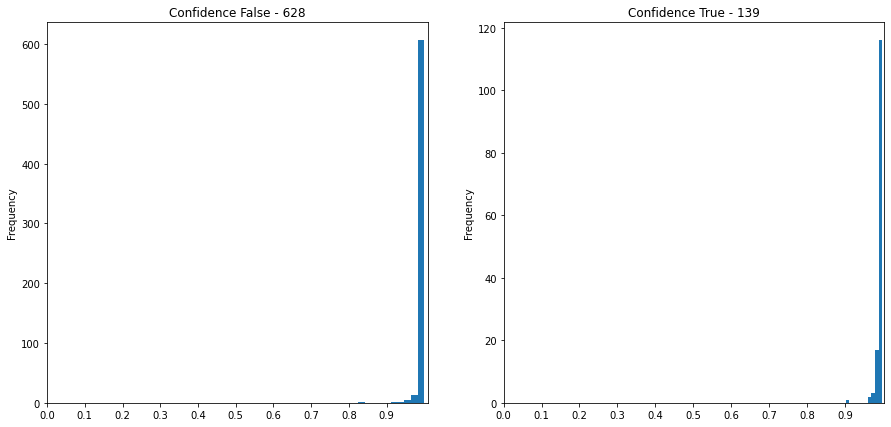

In [9]:
import matplotlib.pyplot as plt

def plot(df):
    labels = list(df["label"].unique())
    fig, axes = plt.subplots(int(len(labels)/2), 2, figsize=(15,7))
    axes = axes.reshape(-1)
    for ax, l in zip(axes,labels):
        print(l)
        df_l = df.query(f"label == {l}")
        print(df_l.shape)
        df_l["confidence"].plot.hist(ax=ax, bins=10, density=False, stacked=True)
        ax.set_title(f"Confidence {l} - {df_l.shape[0]}")
        ticks = list(map(lambda x:x/10 ,range(0,10)))
        ax.set_xticks (ticks)
        ax.set_xticklabels(ticks)
#         ax.set_yticks (ticks)
#         ax.set_yticklabels(ticks)


plot(df_train)        

In [10]:
df_train.groupby("label")["confidence"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
False,628.0,0.996143,0.010153,0.824948,0.997200,0.998786,0.999215,0.999617
True,139.0,0.993010,0.009931,0.902190,0.991227,0.996777,0.997752,0.998383


False
(513, 9)
True
(107, 9)


/Users/aparnaelangovan/PycharmProjects/venv/large-scale-ptm-ppi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/aparnaelangovan/PycharmProjects/venv/large-scale-ptm-ppi/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


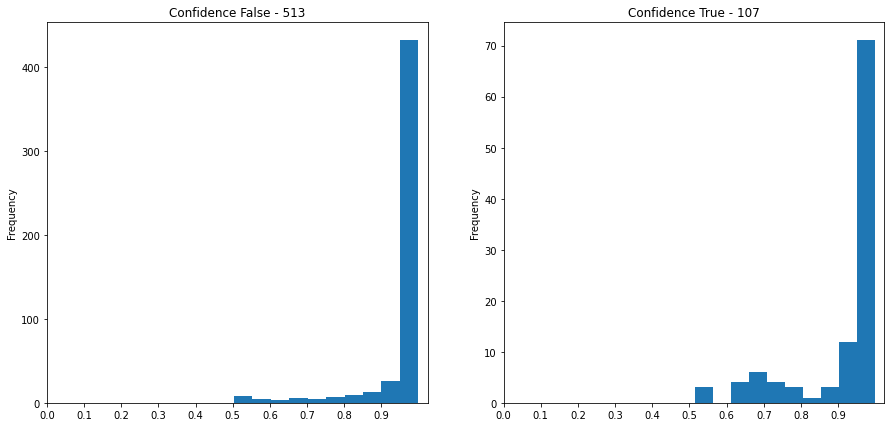

In [11]:
plot(df_test)        

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(df):

    cm = confusion_matrix(df["label"], df["prediction"], labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True, False])
    
    disp.plot()
    
    plt.show()

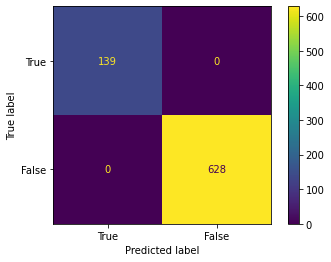

In [13]:
plot_confusion_matrix(df_train)

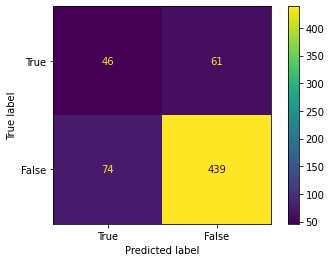

In [14]:
plot_confusion_matrix(df_test)